In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import datetime
from dateutil import parser
import matplotlib.dates as mdates
import matplotlib.ticker as plticker

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Conv1D, Input
from keras.layers import BatchNormalization

In [ ]:

from google.colab import drive
import numpy as np
import pandas as pd
# This will prompt for authorization.
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
results = pd.read_csv('/content/drive/My Drive/Magisterka/dane_final/results_final.csv')

In [ ]:
np.where(np.array(results.auc) == max(results.auc))

(array([105, 106, 107]),)

In [ ]:
np.mean(results.acc)

0.8923388551412355

In [ ]:
max(results.auc)

0.9821549057960508

In [ ]:
results.iloc[105,:]

dropout         0.000000
batch_size      8.000000
no_nodes      100.000000
look_back      24.000000
theta           0.000000
acc             0.948857
auc             0.982155
return         43.488572
Name: 105, dtype: float64

jak wygladaja metryki dla wszystkich ustalonych dla maksymalnego auc, ale ruszam jeden parametr?

In [ ]:
results[['auc', 'acc', 'return']]

,auc,acc,return
0,0.816708,0.757120,14.936567
1,0.816708,0.757120,12.730758
2,0.816708,0.757120,8.196422
3,0.833056,0.664696,7.390465
4,0.833056,0.664696,5.746747
...,...,...,...
880,0.859706,0.909978,29.134511
881,0.859706,0.909978,20.130069
882,0.860599,0.909684,31.798419
883,0.860599,0.909684,27.916969


In [ ]:
results['auc']

0      0.816708
1      0.816708
2      0.816708
3      0.833056
4      0.833056
         ...   
880    0.859706
881    0.859706
882    0.860599
883    0.860599
884    0.860599
Name: auc, Length: 885, dtype: float64

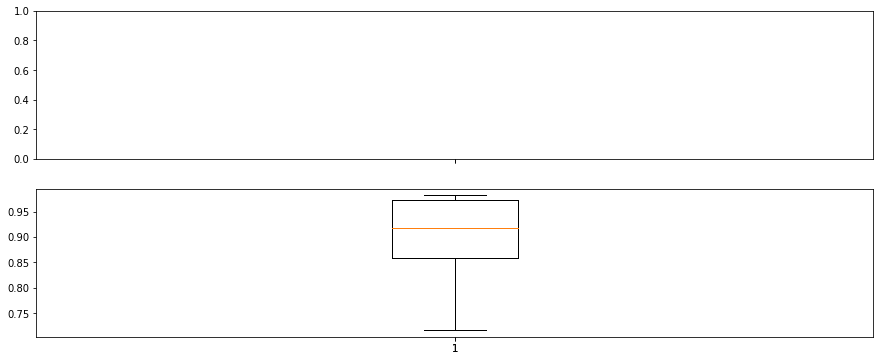

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(15, 6), sharex=True)
kolory = {'comp': 'purple', 'neg':'red', 'neu':'green', 'pos':'blue'}


plt.boxplot(list(results['auc']))







sciezka = '/content/drive/My Drive/Magisterka/wykresy/'
#plt.savefig(sciezka+'feature_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

ValueError: ignored

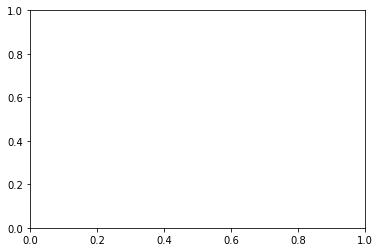

In [ ]:
labels = ['auc', 'acc', 'return']
plt.boxplot(results[['auc', 'acc', 'return']], vert=True, patch_artist=True, labels=labels) 
plt.ylabel('observed value')
plt.title('Multiple Box Plot : Vertical Version')
plt.show()

ruszam dropout

In [ ]:
results_clean[(results_clean.batch_size==8)&(results_clean.no_nodes == 100)&(results_clean.look_back==24)]

,dropout,batch_size,no_nodes,look_back,acc,auc
105,0.0,8.0,100.0,24.0,0.948857,0.982155
546,0.1,8.0,100.0,24.0,0.903156,0.923553


ruszam batch size

In [ ]:
results_clean[(results_clean.dropout==0)&(results_clean.no_nodes == 100)&(results_clean.look_back==24)]

,dropout,batch_size,no_nodes,look_back,acc,auc
105,0.0,8.0,100.0,24.0,0.948857,0.982155
252,0.0,64.0,100.0,24.0,0.950490,0.975287
399,0.0,128.0,100.0,24.0,0.946681,0.969283


ruszam no_nodes

In [ ]:
results_clean[(results_clean.dropout==0)&(results_clean.batch_size == 8)&(results_clean.look_back==24)]

,dropout,batch_size,no_nodes,look_back,acc,auc
21,0.0,8.0,30.0,24.0,0.942329,0.978979
42,0.0,8.0,50.0,24.0,0.946681,0.979356
63,0.0,8.0,70.0,24.0,0.940152,0.981176
84,0.0,8.0,90.0,24.0,0.944505,0.981892
105,0.0,8.0,100.0,24.0,0.948857,0.982155
126,0.0,8.0,150.0,24.0,0.940152,0.982040
147,0.0,8.0,200.0,24.0,0.938520,0.982048


ruszam look_back

In [ ]:
results_clean[(results_clean.dropout==0)&(results_clean.batch_size == 8)&(results_clean.no_nodes==100)]

,dropout,batch_size,no_nodes,look_back,acc,auc
87,0.0,8.0,100.0,1.0,0.684578,0.835107
90,0.0,8.0,100.0,3.0,0.936525,0.977608
93,0.0,8.0,100.0,6.0,0.939116,0.980092
96,0.0,8.0,100.0,9.0,0.941176,0.981221
99,0.0,8.0,100.0,12.0,0.940000,0.982144
102,0.0,8.0,100.0,18.0,0.942516,0.981800
105,0.0,8.0,100.0,24.0,0.948857,0.982155


In [ ]:
results.groupby('dropout').mean()

,batch_size,no_nodes,look_back,theta,acc,auc,return
dropout,,,,,,,
0.0,66.689189,98.581081,10.364865,0.1,0.910012,0.950072,35.281404
0.1,66.666667,98.571429,10.428571,0.1,0.874545,0.860310,25.350612


In [ ]:
results.groupby('batch_size').mean()

,dropout,no_nodes,look_back,theta,acc,auc,return
batch_size,,,,,,,
8.0,0.05,98.571429,10.428571,0.1,0.886981,0.927362,32.078680
64.0,0.05,98.571429,10.428571,0.1,0.896689,0.899327,30.321517
70.0,0.00,100.000000,1.000000,0.1,0.757120,0.816708,11.954582
128.0,0.05,98.571429,10.428571,0.1,0.894727,0.890246,28.785855


In [ ]:
results.groupby('no_nodes').mean()

,dropout,batch_size,look_back,theta,acc,auc,return
no_nodes,,,,,,,
30.0,0.050000,66.666667,10.428571,0.1,0.887284,0.897115,28.999354
50.0,0.050000,66.666667,10.428571,0.1,0.888919,0.902543,29.535813
70.0,0.050000,66.666667,10.428571,0.1,0.892134,0.905408,30.245455
90.0,0.050000,66.666667,10.428571,0.1,0.893784,0.907036,30.517387
100.0,0.048837,66.744186,10.209302,0.1,0.891839,0.905409,30.335642
150.0,0.050000,66.666667,10.428571,0.1,0.895270,0.909599,31.171295
200.0,0.050000,66.666667,10.428571,0.1,0.897154,0.910292,31.524866


In [ ]:
results.groupby('look_back').mean()

,dropout,batch_size,no_nodes,theta,acc,auc,return
look_back,,,,,,,
1.0,0.048837,66.744186,98.604651,0.1,0.716631,0.780877,8.839329
3.0,0.050000,66.666667,98.571429,0.1,0.920567,0.926768,33.722597
6.0,0.050000,66.666667,98.571429,0.1,0.922119,0.926448,34.231428
9.0,0.050000,66.666667,98.571429,0.1,0.922057,0.927224,34.176471
12.0,0.050000,66.666667,98.571429,0.1,0.922304,0.926756,34.189280
18.0,0.050000,66.666667,98.571429,0.1,0.922232,0.925828,33.996282
24.0,0.050000,66.666667,98.571429,0.1,0.924646,0.926465,33.686241


In [ ]:
results.auc.mean()

0.9053434002197395

In [ ]:
results.acc.mean()

0.8923388551412355

In [ ]:
results['return'].mean()

30.3328396953267

In [ ]:
results_clean = results.drop(columns = ['theta', 'return']).drop_duplicates()
results_clean = results_clean.iloc[1:,:]

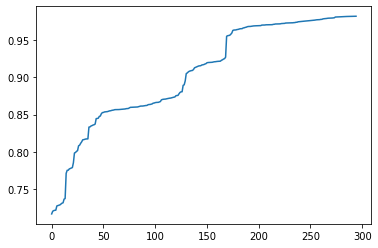

In [ ]:
plt.plot(results_clean.auc.sort_values().reset_index(drop = True))
plt.ylabel("Value")
plt.xlabel("Metric")
plt.title("Auc and acc boxplots")
plt.show()

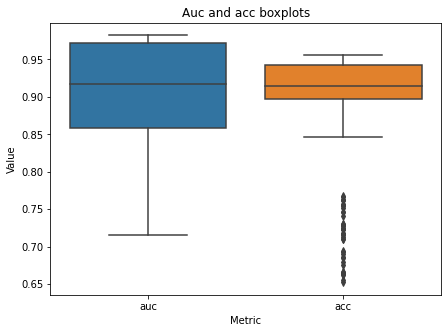

In [ ]:
df = pd.DataFrame(data=results_clean, columns=["auc", 'acc'])
plt.figure(figsize=(7, 5))
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.ylabel("Value")
plt.xlabel("Metric")
plt.title("Auc and acc boxplots")

sciezka = '/content/drive/My Drive/Magisterka/wykresy/'
plt.savefig(sciezka+'boxplot_all.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
drop_0 = results_clean[results_clean.dropout==0].sort_values('auc').reset_index(drop = True)
drop_1 = results_clean[results_clean.dropout==0.1].sort_values('auc').reset_index(drop = True)

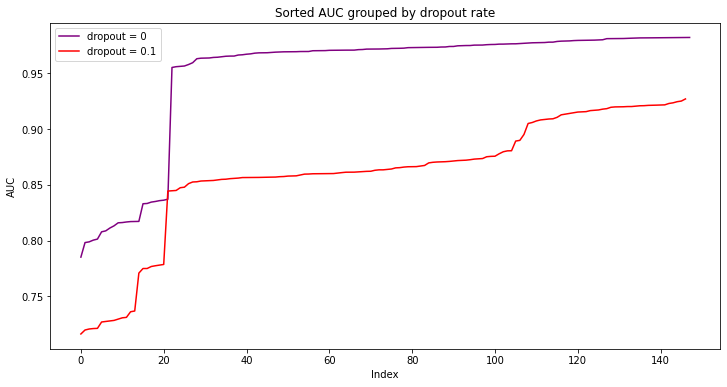

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
kolory = {10: 'purple', 20:'red', 100:'green'}

ax.plot(list(drop_0.index),
        list(drop_0.auc),
        color=kolory[10], label='dropout = 0')

ax.plot(list(drop_1.index),
        list(drop_1.auc),
        color=kolory[20], label='dropout = 0.1')


ax.legend()

# Set title and labels for axes
ax.set(xlabel="Index",
       ylabel="AUC",
       title="Sorted AUC grouped by dropout rate")

plt.show()

In [ ]:
results_clean

,dropout,batch_size,no_nodes,look_back,acc,auc
3,0.0,8.0,30.0,1.0,0.664696,0.833056
6,0.0,8.0,30.0,3.0,0.927918,0.976174
9,0.0,8.0,30.0,6.0,0.930496,0.977957
12,0.0,8.0,30.0,9.0,0.934700,0.978852
15,0.0,8.0,30.0,12.0,0.925405,0.978581
...,...,...,...,...,...,...
870,0.1,128.0,200.0,6.0,0.913254,0.860079
873,0.1,128.0,200.0,9.0,0.909876,0.861391
876,0.1,128.0,200.0,12.0,0.910270,0.862101
879,0.1,128.0,200.0,18.0,0.909978,0.859706


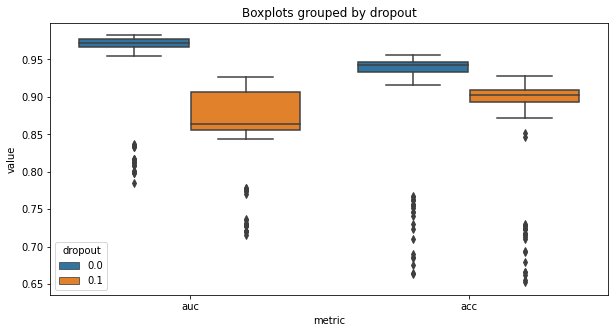

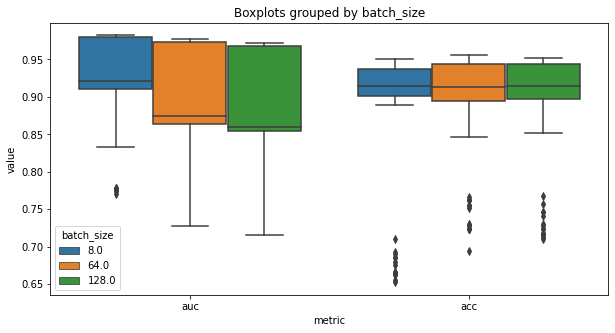

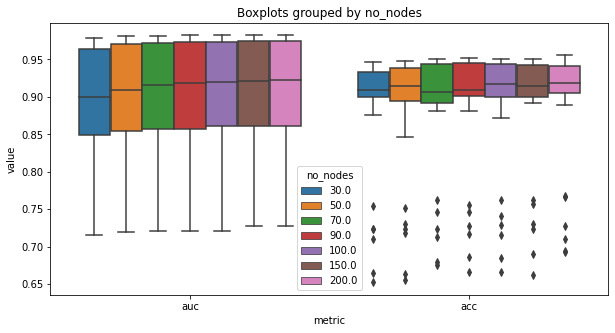

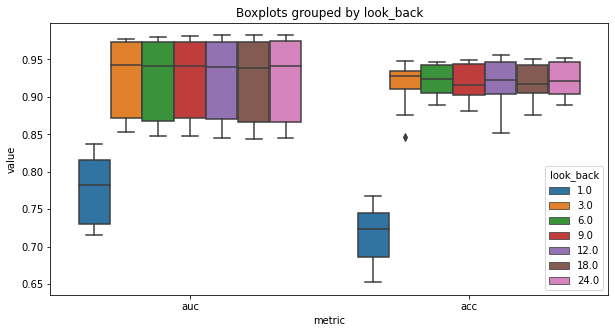

In [ ]:
for varia in[ 'dropout', 'batch_size', 'no_nodes', 'look_back']:
  d = pd.melt(results_clean, id_vars=[varia], value_vars=['auc','acc'])
  d.columns = [varia]+['metric', 'value']
  plt.figure(figsize=(10, 5))
  # make boxplot with Seaborn
  sns.boxplot(x='metric', y='value', hue =varia , data=d)
  # Set labels and title
  plt.ylabel("value")
  plt.xlabel("metric")
  plt.title("Boxplots grouped by "+varia)
  sciezka = '/content/drive/My Drive/Magisterka/wykresy/'
  plt.savefig(sciezka+'boxplot_'+varia+'.png', dpi=300, bbox_inches='tight')
  plt.show()

In [ ]:
batch_sizes = [8,64,128]

In [ ]:
batches = []
for i in batch_sizes:
  batches.append(results_clean[results_clean.batch_size==i].sort_values('auc').reset_index(drop = True))

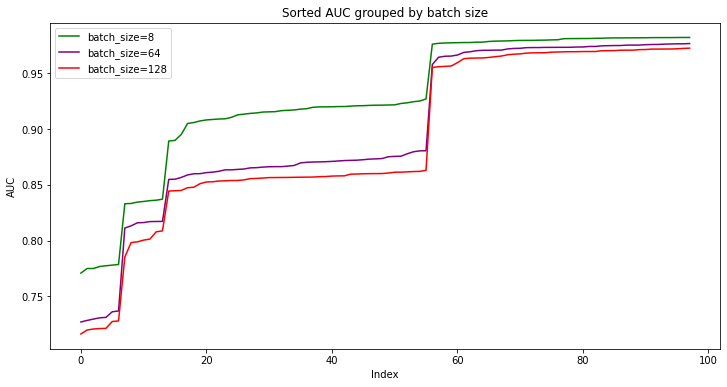

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
kolory = {1: 'purple', 2:'red', 0:'green', 3:'black'}
for i in range(3):
# Add x-axis and y-axis

  ax.plot(list(batches[i].index),
        list(batches[i].auc),
        color=kolory[i], label='batch_size='+str(batch_sizes[i]))


ax.legend()

# Set title and labels for axes
ax.set(xlabel="Index",
       ylabel="AUC",
       title="Sorted AUC grouped by batch size")

plt.show()

,dropout,batch_size,no_nodes,look_back,acc,auc
0,0.0,70.0,100.0,1.0,0.75712,0.816708


Text(0.5, 1.0, 'Auc boxplots grouped by batch size')

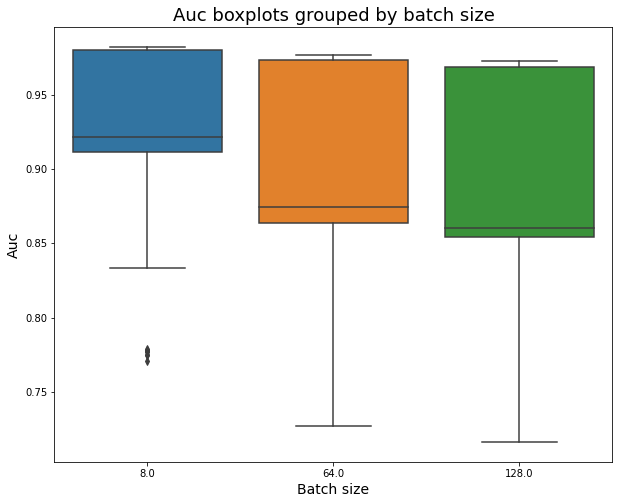

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
# make boxplot with Seaborn
sns.boxplot(x="batch_size", y="auc", data=results_clean)
# Set labels and title
plt.ylabel("Auc", size=14)
plt.xlabel("Batch size", size=14)
plt.title("Auc boxplots grouped by batch size", size=18)
#plt.savefig("simple_boxplot_Seaborn_boxplot_Python.png")

In [ ]:
batch_sizes = [30,50,70,90,100, 150,200]
batches = []
for i in batch_sizes:
  batches.append(results_clean[results_clean.no_nodes==i].sort_values('auc').reset_index(drop = True))

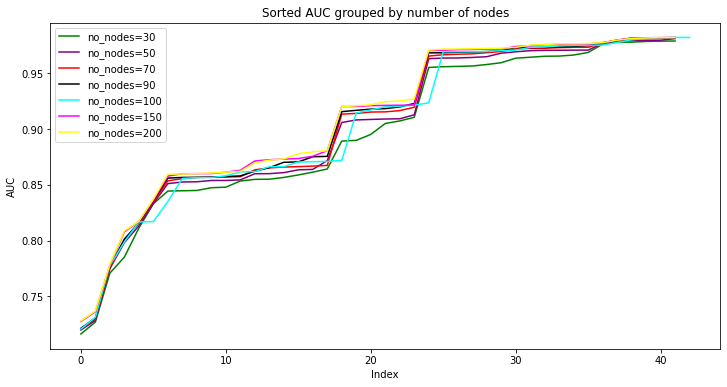

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
kolory = {1: 'purple', 2:'red', 0:'green', 3:'black', 4: 'cyan',
5: 'magenta',
6: 'yellow', 7:'blue'}
for i in range(len(batch_size)):
# Add x-axis and y-axis

  ax.plot(list(batches[i].index),
        list(batches[i].auc),
        color=kolory[i], label='no_nodes='+str(batch_sizes[i]))


ax.legend()

# Set title and labels for axes
ax.set(xlabel="Index",
       ylabel="AUC",
       title="Sorted AUC grouped by number of nodes")

plt.show()

Text(0.5, 1.0, 'Auc boxplots grouped by the number of nodes')

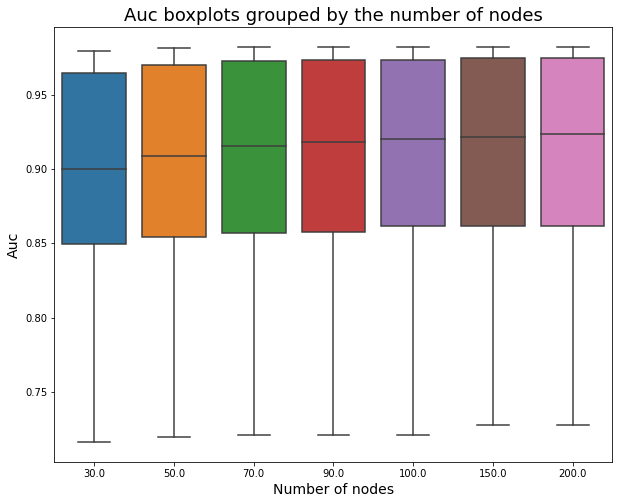

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
# make boxplot with Seaborn
sns.boxplot(x="no_nodes", y="auc", data=results_clean)
# Set labels and title
plt.ylabel("Auc", size=14)
plt.xlabel("Number of nodes", size=14)
plt.title("Auc boxplots grouped by the number of nodes", size=18)
#plt.savefig("simple_boxplot_Seaborn_boxplot_Python.png")

In [ ]:
batch_sizes = [1,3,6,9,12,18,24]
batches = []
for i in batch_sizes:
  batches.append(results_clean[results_clean.look_back==i].sort_values('auc').reset_index(drop = True))

In [ ]:
pd.unique(results.look_back)

array([ 1.,  3.,  6.,  9., 12., 18., 24.])

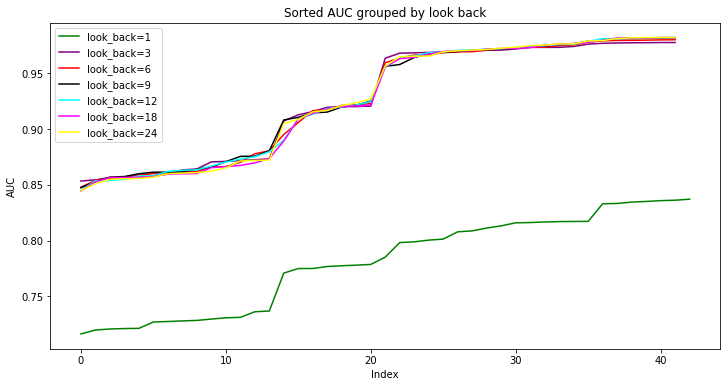

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
kolory = {1: 'purple', 2:'red', 0:'green', 3:'black', 4: 'cyan',
5: 'magenta',
6: 'yellow', 7:'blue'}
for i in range(len(batch_sizes)):
# Add x-axis and y-axis

  ax.plot(list(batches[i].index),
        list(batches[i].auc),
        color=kolory[i], label='look_back='+str(batch_sizes[i]))


ax.legend()

# Set title and labels for axes
ax.set(xlabel="Index",
       ylabel="AUC",
       title="Sorted AUC grouped by look back")

plt.show()

Text(0.5, 1.0, 'Auc boxplots grouped by lookback')

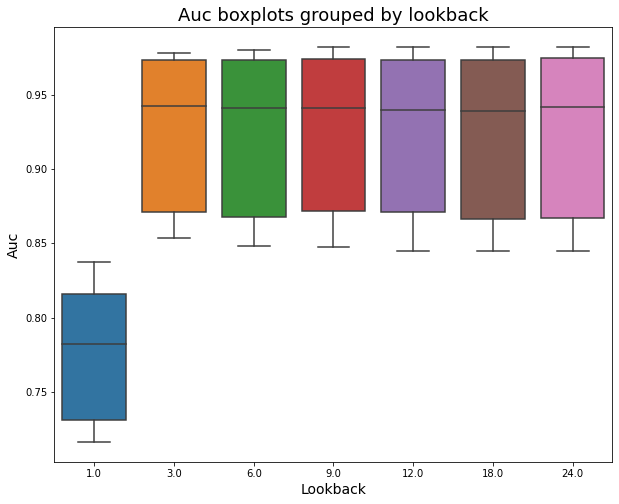

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
# make boxplot with Seaborn
sns.boxplot(x="look_back", y="auc", data=results_clean)
# Set labels and title
plt.ylabel("Auc", size=14)
plt.xlabel("Lookback", size=14)
plt.title("Auc boxplots grouped by lookback", size=18)
#plt.savefig("simple_boxplot_Seaborn_boxplot_Python.png")

In [ ]:
batch_sizes = [0,0.1, 0.2]
batches = []
for i in batch_sizes:
  batches.append(results[results.theta==i].sort_values('return').reset_index(drop = True))

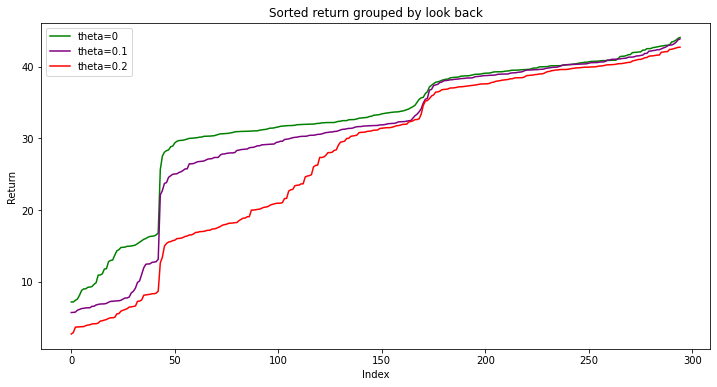

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
kolory = {1: 'purple', 2:'red', 0:'green', 3:'black', 4: 'cyan',
5: 'magenta',
6: 'yellow', 7:'blue'}
for i in range(len(batch_sizes)):
# Add x-axis and y-axis

  ax.plot(list(batches[i].index),
        list(batches[i]['return']),
        color=kolory[i], label='theta='+str(batch_sizes[i]))


ax.legend()

# Set title and labels for axes
ax.set(xlabel="Index",
       ylabel="Return",
       title="Sorted return grouped by look back")

plt.show()

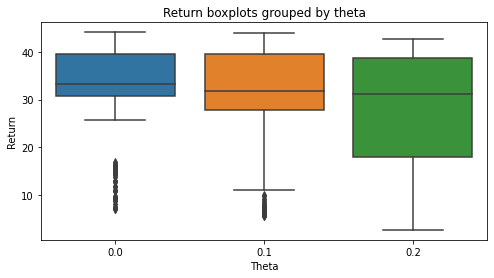

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 4))
# make boxplot with Seaborn
sns.boxplot(x="theta", y="return", data=results)
# Set labels and title
plt.ylabel("Return")
plt.xlabel("Theta")
plt.title("Return boxplots grouped by theta")
sciezka = '/content/drive/My Drive/Magisterka/wykresy/'
plt.savefig(sciezka+'boxplot_return.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
np.mean(results['return'])

30.3328396953267

In [ ]:
df_21 = pd.read_csv('/content/drive/My Drive/Magisterka/dane_final/data_classifier_2021.csv')
results_21 = pd.read_csv('/content/drive/My Drive/Magisterka/dane_final/results_final_21.csv')

In [ ]:
lista_testowych = []
for i in range(11):
  lista_testowych.append(df_21.iloc[i*2000:(i+1)*2000,:])

In [ ]:
wzrosty = []
for i in lista_testowych:
  wzrosty.append(i.open.iloc[-1]/i.open.iloc[0])


In [ ]:
wzrosty

[1.5785067279953195,
 1.8356041581986335,
 0.8324186237986158,
 0.8708020118551416,
 0.8941789738373186,
 1.40496523655049,
 1.27405557188102,
 0.917452642819007,
 1.431505076387906,
 2.0637800217896807,
 1.846193863477459]

In [ ]:
wzrosty_max = []
for i in lista_testowych:
  wzrosty_max.append(max(i.open)/min(i.open))


In [ ]:
wzrosty_max

[1.645048989381946,
 2.673085351787774,
 1.5758974742537921,
 1.5306985555509685,
 2.530593322100207,
 1.7344059767879185,
 1.3897722543197388,
 1.210452497149648,
 1.5200807157099563,
 2.698926201325695,
 2.1835833391379853]

In [ ]:
daty = []
for i in lista_testowych:
  daty.append([i.date.iloc[0], i.date.iloc[-1]])

In [ ]:
daty

[['2019-02-01 14:00:00+00:00', '2019-04-25 21:00:00+00:00'],
 ['2019-04-25 22:00:00+00:00', '2019-07-18 05:00:00+00:00'],
 ['2019-07-18 06:00:00+00:00', '2019-10-09 13:00:00+00:00'],
 ['2019-10-09 14:00:00+00:00', '2019-12-31 21:00:00+00:00'],
 ['2019-12-31 22:00:00+00:00', '2020-03-24 05:00:00+00:00'],
 ['2020-03-24 06:00:00+00:00', '2020-06-15 13:00:00+00:00'],
 ['2020-06-15 14:00:00+00:00', '2020-08-19 22:00:00+00:00'],
 ['2020-08-19 22:00:00+00:00', '2020-09-30 14:00:00+00:00'],
 ['2020-09-30 14:00:00+00:00', '2020-11-11 06:00:00+00:00'],
 ['2020-11-11 06:00:00+00:00', '2021-01-24 17:00:00+00:00'],
 ['2021-01-24 18:00:00+00:00', '2021-04-18 03:00:00+00:00']]

In [ ]:
wzrosty

[1.5785067279953195,
 1.8356041581986335,
 0.8324186237986158,
 0.8708020118551416,
 0.8941789738373186,
 1.40496523655049,
 1.27405557188102,
 0.917452642819007,
 1.431505076387906,
 2.0637800217896807,
 1.846193863477459]

In [ ]:
results_21

,dropout,batch_size,no_nodes,look_back,acc_0,auc_0,acc_1,auc_1,acc_2,auc_2,acc_3,auc_3,acc_4,auc_4,acc_5,auc_5,acc_6,auc_6,acc_7,auc_7,acc_8,auc_8,acc_9,auc_9,acc_10,auc_10,acc_11,auc_11,theta,return_0,return_1,return_2,return_3,return_4,return_5,return_6,return_7,return_8,return_9,return_10,return_11
0,0.0,8.0,30.0,1.0,0.747985,0.835222,0.835184,0.757379,0.835012,0.649325,0.833446,0.571786,0.832278,0.629815,0.831547,0.633817,0.830962,0.655828,0.829897,0.587794,0.828649,0.627314,0.827386,0.591796,0.825153,0.500250,0.822009,0.484242,0.0,13.306395,5.299319,26.436012,3.841427,5.801502,15.678695,14.034883,2.144226,1.372275,1.127619,1.000000,1.0
1,0.0,8.0,30.0,1.0,0.747985,0.835222,0.835184,0.757379,0.835012,0.649325,0.833446,0.571786,0.832278,0.629815,0.831547,0.633817,0.830962,0.655828,0.829897,0.587794,0.828649,0.627314,0.827386,0.591796,0.825153,0.500250,0.822009,0.484242,0.1,10.899011,4.240159,15.476329,3.118863,4.586113,12.071764,9.616951,1.809592,1.447156,1.123579,1.000000,1.0
2,0.0,8.0,30.0,1.0,0.747985,0.835222,0.835184,0.757379,0.835012,0.649325,0.833446,0.571786,0.832278,0.629815,0.831547,0.633817,0.830962,0.655828,0.829897,0.587794,0.828649,0.627314,0.827386,0.591796,0.825153,0.500250,0.822009,0.484242,0.2,8.693245,3.404589,8.660008,2.306609,3.857286,7.883332,6.615601,1.548977,1.351987,1.136968,1.000000,1.0
3,0.0,8.0,30.0,3.0,0.930070,0.976434,0.976483,0.940911,0.976520,0.915373,0.976510,0.919880,0.976513,0.908363,0.976503,0.896345,0.976430,0.894342,0.976210,0.739609,0.974567,0.495744,0.972651,0.526289,0.971282,0.785679,0.970884,0.721082,0.0,39.650284,10.124834,255.836372,43.253047,27.784226,105.204736,74.408119,4.422700,1.106141,1.769053,192.644472,NaN
4,0.0,8.0,30.0,3.0,0.930070,0.976434,0.976483,0.940911,0.976520,0.915373,0.976510,0.919880,0.976513,0.908363,0.976503,0.896345,0.976430,0.894342,0.976210,0.739609,0.974567,0.495744,0.972651,0.526289,0.971282,0.785679,0.970884,0.721082,0.1,39.594873,10.052094,239.326119,42.052693,28.428442,97.072755,69.478328,4.752974,1.303965,2.095273,172.421346,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,0.1,128.0,200.0,18.0,0.908894,0.861681,0.862162,0.913724,0.862653,0.910192,0.863128,0.892533,0.863641,0.907669,0.864155,0.897074,0.864587,0.877397,0.864843,0.768416,0.863900,0.592331,0.862769,0.596872,0.862054,0.780525,0.861916,0.679112,0.1,28.903825,8.227849,174.885419,27.354014,21.157040,79.053408,55.549522,5.737684,3.766809,4.604334,188.173702,NaN
878,0.1,128.0,200.0,18.0,0.908894,0.861681,0.862162,0.913724,0.862653,0.910192,0.863128,0.892533,0.863641,0.907669,0.864155,0.897074,0.864587,0.877397,0.864843,0.768416,0.863900,0.592331,0.862769,0.596872,0.862054,0.780525,0.861916,0.679112,0.2,18.683999,6.192004,85.730876,17.598551,14.730896,52.896369,34.425129,4.858291,3.760969,4.690619,95.132153,NaN
879,0.1,128.0,200.0,24.0,0.905332,0.861897,0.862368,0.912449,0.862850,0.908401,0.863320,0.897267,0.863833,0.900810,0.864335,0.889676,0.864776,0.881579,0.865032,0.775304,0.864070,0.589575,0.862906,0.585526,0.862166,0.794534,0.862000,0.646761,0.0,31.898803,9.213897,260.394291,35.879974,23.610343,94.739684,68.550389,6.126202,2.398686,3.020096,264.772576,NaN
880,0.1,128.0,200.0,24.0,0.905332,0.861897,0.862368,0.912449,0.862850,0.908401,0.863320,0.897267,0.863833,0.900810,0.864335,0.889676,0.864776,0.881579,0.865032,0.775304,0.864070,0.589575,0.862906,0.585526,0.862166,0.794534,0.862000,0.646761,0.1,29.460855,8.471020,181.550703,28.335652,20.985678,75.206250,52.673974,7.010590,3.625430,4.299248,199.351375,NaN


# CNN-LSTM

In [ ]:
results_cnn = pd.read_csv('/content/drive/My Drive/Magisterka/dane_final/results_final_cnn.csv')

In [ ]:
results = pd.read_csv('/content/drive/My Drive/Magisterka/dane_final/results_final.csv')

In [ ]:
wyniki = pd.DataFrame(columns = ['LSTM', 'CNN-LSTM'])

In [ ]:
wyniki['CNN-LSTM'] = np.round([np.mean(results_cnn.auc),np.max(results_cnn.auc),np.mean(results_cnn.acc),np.max(results_cnn.acc), np.mean(results_cnn['return']),np.max(results_cnn['return'])],3)

In [ ]:
wyniki['LSTM'] = np.round([np.mean(results.auc),np.max(results.auc),np.mean(results.acc),np.max(results.acc), np.mean(results['return']),np.max(results['return'])],3)

In [ ]:
wyniki.index = ['mean auc', 'max auc', 'mean acc', 'max acc', 'mean return', 'max return']

In [ ]:
print(wyniki.to_latex())

\begin{tabular}{lrr}
\toprule
{} &    LSTM &  CNN-LSTM \\
\midrule
mean auc    &   0.905 &     0.935 \\
max auc     &   0.982 &     0.977 \\
mean acc    &   0.892 &     0.722 \\
max acc     &   0.956 &     0.930 \\
mean return &  30.333 &    12.967 \\
max return  &  44.111 &    40.083 \\
\bottomrule
\end{tabular}



In [ ]:
results_box = results[['auc','acc','return']]
results_box['type'] = 'lstm'
results_box_cnn = results_cnn[['auc','acc','return']]
results_box_cnn['type'] = 'cnn'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
res_box = pd.concat([results_box, results_box_cnn]).reset_index(drop=True)

In [ ]:
d = pd.melt(res_box, id_vars=['type'], value_vars=['auc','acc'])
d.columns = ['model']+['metric', 'value']

In [ ]:
d

,model,metric,value
0,lstm,auc,0.816708
1,lstm,auc,0.816708
2,lstm,auc,0.816708
3,lstm,auc,0.833056
4,lstm,auc,0.833056
...,...,...,...
2059,cnn,acc,0.840588
2060,cnn,acc,0.840588
2061,cnn,acc,0.609902
2062,cnn,acc,0.609902


In [ ]:
import seaborn as sns

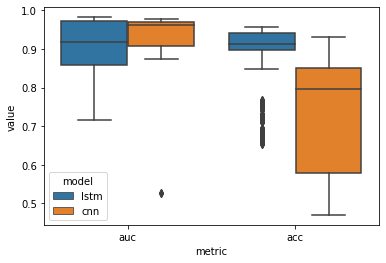

In [ ]:
sns.boxplot(x='metric', y='value', hue ='model' , data=d)
  # Set labels and title
plt.ylabel("value")
plt.xlabel("metric")
#plt.title("Comparison of types")
sciezka = '/content/drive/My Drive/Magisterka/wykresy/'
plt.savefig(sciezka+'cnn_lstm_comparison_auc_acc.png', dpi=300, bbox_inches='tight')
plt.show()

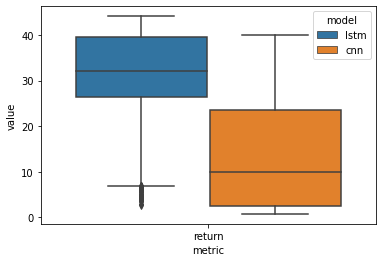

In [ ]:
d = pd.melt(res_box, id_vars=['type'], value_vars=['return'])
d.columns = ['model']+['metric', 'value']
sns.boxplot(x='metric', y='value', hue ='model' , data=d)
  # Set labels and title
plt.ylabel("value")
#plt.title("Comparison of types")
sciezka = '/content/drive/My Drive/Magisterka/wykresy/'
plt.savefig(sciezka+'cnn_lstm_comparison_return.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
results = pd.read_csv('/content/drive/My Drive/Magisterka/dane_final/data_classifier_2021.csv')

In [ ]:
print(pd.Series([results.date.iloc[0], results.date.iloc[-1], results.open.iloc[0], results.open.iloc[-1], np.max(results.open), np.min(results.open), results.y.value_counts()[0], results.y.value_counts()[1],results.shape[0]],index=['start date', 'end date', 'start price', 'end price','max price', 'min price','number of 0', 'number of 1','number of observations']).to_latex())

\begin{tabular}{ll}
\toprule
{} &                          0 \\
\midrule
start date             &  2019-02-01 15:00:00+00:00 \\
end date               &  2021-04-20 23:00:00+00:00 \\
start price            &                       3467 \\
end price              &                      56380 \\
max price              &                    64577.2 \\
min price              &                    3389.51 \\
number of 0            &                       9420 \\
number of 1            &                       9996 \\
number of observations &                      19416 \\
\bottomrule
\end{tabular}

